In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

1. csv 폴더 안에 card 폴더에 있는 "오프라인.csv" 파일 로드
2. 컬럼의 이름을 변경: 기준년월, 업종, 성별, 연령대, 총이용건수, 총이용금액
3. 결측치자 존재하는가?
4. 기준년월 데이터를 시계열 데이터로 변경
5. 남/여 성별을 기준으로 연도별 건당 이용금액의 평균이 어떻게 되는가?

In [5]:
offline=pd.read_csv("csv/card/오프라인.csv", encoding="CP949")
# 파일명 한글 에러: 인코딩 기본값(utf-8), CP949, EUC-KR 해결

In [6]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [7]:
offline.columns=["기준년월","업종","성별","연령대","총이용건수","총이용금액"]

In [8]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [10]:
offline.isna().sum()
# 결측치 없음

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [11]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [13]:
offline["기준년월"]=pd.to_datetime(offline["기준년월"], format="%Y%m")

In [14]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2648 non-null   datetime64[ns]
 1   업종      2648 non-null   object        
 2   성별      2648 non-null   int64         
 3   연령대     2648 non-null   int64         
 4   총이용건수   2648 non-null   int64         
 5   총이용금액   2648 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 124.3+ KB


In [15]:
# 성별 데이터의 빈도수 확인
offline["성별"].value_counts()

성별
2    1336
1    1312
Name: count, dtype: int64

In [16]:
# 연령대 데이터의 빈도수 확인
offline["연령대"].value_counts()

연령대
10    264
20    264
30    264
70    264
40    264
50    264
60    264
90    264
80    264
0     233
1      39
Name: count, dtype: int64

In [21]:
# 건당 이용금액 파생변수 생성
offline["건당이용금액"]=round(offline["총이용금액"]/offline["총이용건수"], 2)
# 2자리 반올림

In [20]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,7600.00
1,2019-01-01,백화점,1,10,379,1.945872e+07,51342.27
2,2019-01-01,백화점,1,20,45173,4.747711e+09,105100.64
3,2019-01-01,백화점,1,30,271858,2.791826e+10,102694.28
4,2019-01-01,백화점,1,40,391109,3.791149e+10,96933.30


In [23]:
# 기준년 파생 변수 생성
# 기준년월 데이터에서 년도만 따로 추출하여 문자형태로 데이터 대입

from datetime import datetime

offline["기준년월"].dt.strftime("%Y")

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: object

In [26]:
# case2
# 시계열 데이터에서 strftime 함수 이용
offline.loc[0,"기준년월"].strftime("%Y")

'2019'

In [27]:
# case3
offline.loc[0,"기준년월"].year

2019

In [28]:
offline["기준년"]=offline["기준년월"].dt.year

In [29]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,7600.00,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,51342.27,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,105100.64,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,102694.28,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,96933.30,2019


In [31]:
offline[["성별","건당이용금액","기준년"]].groupby(["성별","기준년"]).mean()

건당이용금액
성별 기준년               
1  2019  39184.349663
   2020  44009.589560
   2021  46948.320222
2  2019  38107.838727
   2020  41389.763077
   2021  43306.318944

In [32]:
group_dt=offline[["성별","건당이용금액","기준년"]].groupby(["성별","기준년"]).mean()

In [44]:
plt.rc("font", family="Malgun Gothic")

<Axes: xlabel='성별,기준년'>

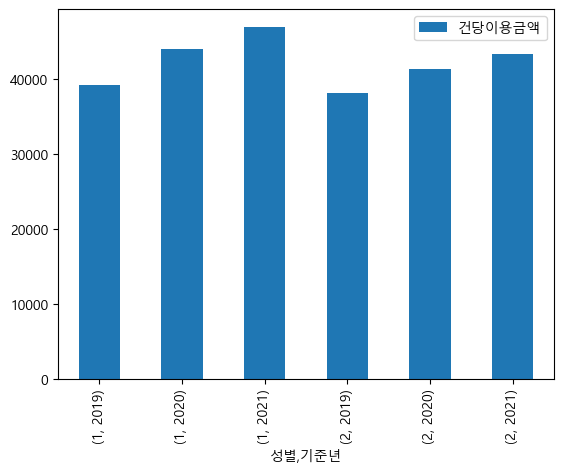

In [45]:
group_dt.plot(kind='bar')

In [46]:
group_dt.unstack()

건당이용금액                            
기준년          2019          2020          2021
성별                                           
1    39184.349663  44009.589560  46948.320222
2    38107.838727  41389.763077  43306.318944

<Axes: xlabel='성별'>

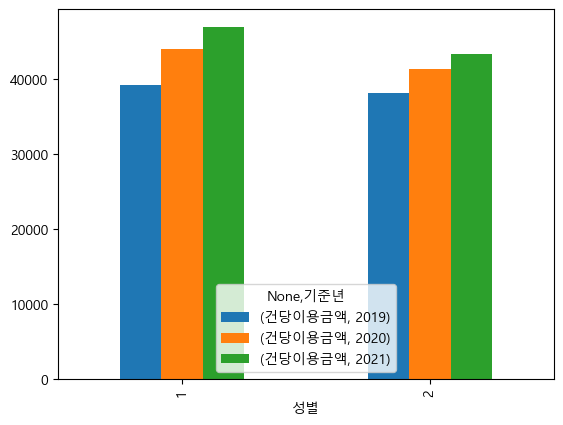

In [47]:
group_dt=group_dt.unstack()
group_dt.plot(kind="bar")

In [48]:
# case2

pivot_dt=pd.pivot_table(
    offline,
    index="성별",
    columns="기준년",
    values="건당이용금액",
    aggfunc="mean"
)

<Axes: xlabel='성별'>

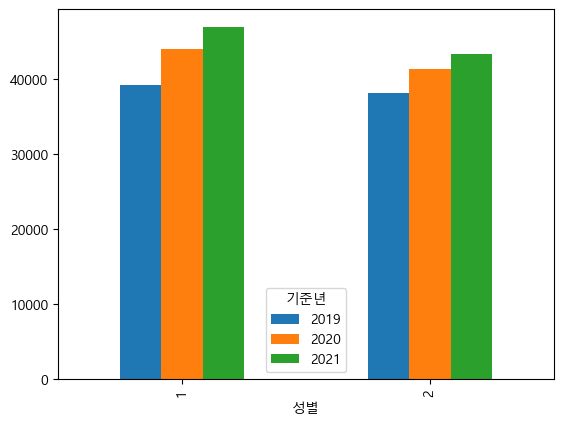

In [49]:
pivot_dt.plot(kind="bar")

#### 데이터프레임 결합
- 단순 결합 (유니언 결합)
    - 인덱스를 추가하는 결합의 형태 (일반적)
        - 같은 컬럼의 형태를 가진 데이터프레임 2개를 결합
    - 컬럼을 추가하는 결합의 형태
        - 특수한 경우
    - 판다스 안에 있는 concat() 함수 이용
- 특정 조건에 맞춰서 컬럼을 결합하는 형태 (조인 결합)
    - 데이터프레임에서 특정 컬럼의 데이터가 같은 값 조건식을 사용하여 컬럼을 조합
    - 판다스 안에 있는 merge() 함수 이용

In [86]:
# 온라인 데이터 로드
online=pd.read_csv("csv/card/온라인.csv")

In [87]:
online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [88]:
# 단순한 행 결합
pd.concat(
    [offline, online] # axis=0 기본 값 // ,axis=1 설정 시 출력값 변경
)
# 컬럼의 이름이 같지 않은 경우

,기준년월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액,기준년,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,2019-01-01,백화점,1.0,1.0,1.0,7.600000e+03,7600.00,2019.0,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,백화점,1.0,10.0,379.0,1.945872e+07,51342.27,2019.0,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,백화점,1.0,20.0,45173.0,4.747711e+09,105100.64,2019.0,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,백화점,1.0,30.0,271858.0,2.791826e+10,102694.28,2019.0,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,백화점,1.0,40.0,391109.0,3.791149e+10,96933.30,2019.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202109.0,2.0,50.0,3237324.0,1.813605e+11
647,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202109.0,2.0,60.0,1019719.0,7.002663e+10
648,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202109.0,2.0,70.0,159261.0,1.309103e+10
649,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202109.0,2.0,80.0,20094.0,1.935122e+09


In [89]:
# 컬럼의 이름을 변경
online.columns=["기준년월","성별","연령대","총이용건수","총이용금액"]

In [90]:
# 파생변수 생성 : 업종 -> 데이터를 "온라인"
online["업종"]="온라인"

In [91]:
online.head()

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,20,272915,13854081656,온라인
3,201901,1,30,1320227,82946127640,온라인
4,201901,1,40,1372052,95550848337,온라인


In [92]:
# 기준년월 데이터를 시계열로 변경
online["기준년월"]=pd.to_datetime(online["기준년월"], format="%Y%m")

In [93]:
# 기준년 파생변수 생성
online["기준년"]=online["기준년월"].dt.year

In [94]:
# 건당이용금액 파생변수 생성
online["건당이용금액"]=round(
    online["총이용금액"]/online["총이용건수"],
    2
)

In [95]:
online.head()

,기준년월,성별,연령대,총이용건수,총이용금액,업종,기준년,건당이용금액
0,2019-01-01,1,1,1,110685,온라인,2019,110685.00
1,2019-01-01,1,10,2333,98108225,온라인,2019,42052.39
2,2019-01-01,1,20,272915,13854081656,온라인,2019,50763.36
3,2019-01-01,1,30,1320227,82946127640,온라인,2019,62827.17
4,2019-01-01,1,40,1372052,95550848337,온라인,2019,69640.84


In [96]:
pd.concat(
    [offline, online]
)

,기준년월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,7600.00,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,51342.27,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,105100.64,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,102694.28,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,96933.30,2019
...,...,...,...,...,...,...,...,...
646,2021-09-01,온라인,2,50,3237324,1.813605e+11,56021.74,2021
647,2021-09-01,온라인,2,60,1019719,7.002663e+10,68672.47,2021
648,2021-09-01,온라인,2,70,159261,1.309103e+10,82198.59,2021
649,2021-09-01,온라인,2,80,20094,1.935122e+09,96303.50,2021


In [101]:
df=pd.concat(
    [offline, online],
    ignore_index=True # 인덱스 재설정
)

In [100]:
df

,기준년월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,7600.00,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,51342.27,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,105100.64,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,102694.28,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,96933.30,2019
...,...,...,...,...,...,...,...,...
3294,2021-09-01,온라인,2,50,3237324,1.813605e+11,56021.74,2021
3295,2021-09-01,온라인,2,60,1019719,7.002663e+10,68672.47,2021
3296,2021-09-01,온라인,2,70,159261,1.309103e+10,82198.59,2021
3297,2021-09-01,온라인,2,80,20094,1.935122e+09,96303.50,2021


<Axes: xlabel='기준년월'>

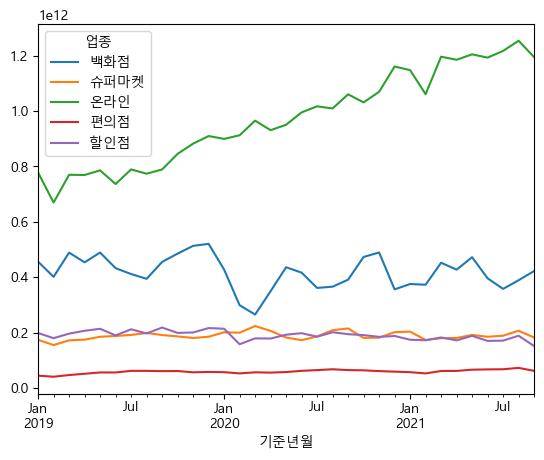

In [103]:
# 기준년월, 업종별 총이용금액의 합계를 그래프 시각화
pd.pivot_table(
    df,
    index="기준년월",
    columns="업종",
    values="총이용금액",
    aggfunc="sum"
).plot()
